In [110]:
import pandas as pd
import datetime
# Claning data

cpi=pd.read_csv("cpi_in_usa.csv", sep=";")
inflation=pd.read_csv("us_inflation_rate_historical_data.csv")
inflation.columns=["date", "inflationrate","annualchange","vuota"]
inflation=inflation[["date","inflationrate","annualchange"]]
inflation["annualchange"]=inflation["annualchange"].fillna(inflation["annualchange"].mean())
price=pd.read_csv("coffee-prices-historical-data.csv")
cpi["Year"]=cpi["Year"].astype(int)
cpi['Year'] = pd.to_datetime(cpi['Year'], format='%Y') 
cpi.columns=["year","annualcpi","percentchangincpi"] 
cpi["percentchangincpi"]=cpi["percentchangincpi"].str.replace("%","") 
inflation["annualchange"]=inflation["annualchange"]*100  
price.dropna(inplace=True)
price["date"]=pd.to_datetime(price["date"])
price2=price.copy()
price["date"]=price["date"].dt.year
price=price.groupby("date").mean().reset_index()
merged=pd.merge(cpi,price, left_on=cpi["year"].dt.year, right_on="date", how="inner")
merged=merged.drop(columns=["year"])
inflation["date"]=pd.to_datetime(inflation["date"])
print(inflation.dtypes)
db=pd.merge(merged, inflation, left_on="date", right_on=inflation["date"].dt.year)
db=db.drop(columns=["date_x","date_y"])
db.rename(columns={"annualchange":"changeinflation"}, inplace=True)
db.rename(columns={" value":"cofeeprice"}, inplace=True)
print(db.dtypes)
print(db.tail(5))


date             datetime64[ns]
inflationrate           float64
annualchange            float64
dtype: object
date                   int32
annualcpi            float64
percentchangincpi     object
cofeeprice           float64
inflationrate        float64
changeinflation      float64
dtype: object
    date  annualcpi percentchangincpi  cofeeprice  inflationrate  \
44  2017      245.1               2.1    1.334556         2.1301   
45  2018      251.1               2.4    1.136044         2.4426   
46  2019      255.7               1.8    1.018240         1.8122   
47  2020      258.8               1.2    1.113771         1.2336   
48  2021      271.0               4.7    1.693321         4.6979   

    changeinflation  
44             87.0  
45             31.0  
46            -63.0  
47            -58.0  
48            346.0  


                   annualcpi  percentchangincpi  cofeeprice  inflationrate  \
annualcpi           1.000000          -0.714819    0.060567      -0.714742   
percentchangincpi  -0.714819           1.000000    0.024431       0.999942   
cofeeprice          0.060567           0.024431    1.000000       0.024839   
inflationrate      -0.714742           0.999942    0.024839       1.000000   
changeinflation    -0.012213           0.320272    0.065648       0.315641   

                   changeinflation  
annualcpi                -0.012213  
percentchangincpi         0.320272  
cofeeprice                0.065648  
inflationrate             0.315641  
changeinflation           1.000000  


<Axes: >

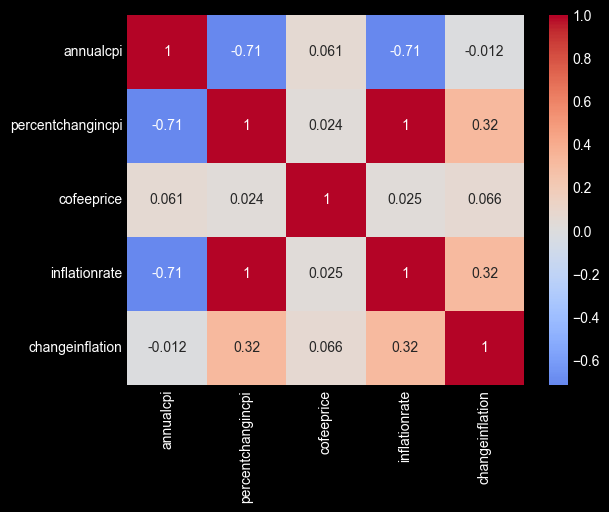

In [111]:
#Calculating correlations

import seaborn as sns
from matplotlib import pyplot as plt
cor=db.drop(columns=["date"]).corr()
print(cor)
sns.heatmap(cor, annot=True, cmap="coolwarm", center=0)


array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'annualcpi'}>],
       [<Axes: title={'center': 'cofeeprice'}>,
        <Axes: title={'center': 'inflationrate'}>],
       [<Axes: title={'center': 'changeinflation'}>, <Axes: >]],
      dtype=object)

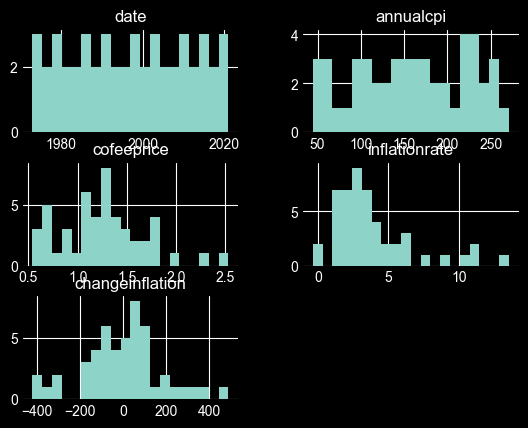

In [112]:
# Studying data distribuition

db1=db.copy()
db.hist(bins=20)



   date  annualcpi  percentchangincpi  cofeeprice  inflationrate  \
0  1973   0.000000           0.474820    0.058729       0.469863   
1  1974   0.021624           0.827338    0.065267       0.820607   
2  1975   0.041483           0.683453    0.058396       0.683122   
3  1976   0.055163           0.438849    0.443832       0.438722   
4  1977   0.071492           0.496403    0.891063       0.493157   

   changeinflation  
0         0.783040  
1         1.000000  
2         0.252203  
3         0.088106  
4         0.546256  


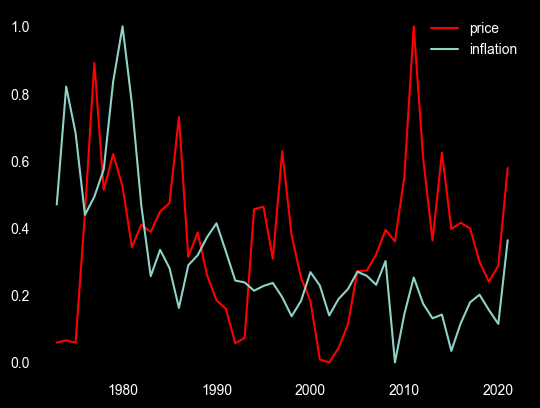

In [122]:
# Scaling data

from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
# scalerannualcpi=StandardScaler()
# db1["annualcpi"]=scalerannualcpi.fit_transform(db1[["annualcpi"]])
# scalerchangecpi=StandardScaler()
# db1["percentchangincpi"]=scalerchangecpi.fit_transform(db1[["percentchangincpi"]])
scalerprice=MinMaxScaler()
db1["cofeeprice"]=scalerprice.fit_transform(db1[["cofeeprice"]])
# scalerinflation=StandardScaler()
# db1["inflationrate"]=scalerinflation.fit_transform(db1[["inflationrate"]])
# scalerchangeinfl=StandardScaler()
# db1["changeinflation"]=scalerchangeinfl.fit_transform(db1[["changeinflation"]])
scalerall=MinMaxScaler()
db1[["annualcpi","percentchangincpi","inflationrate","changeinflation"]]=scalerall.fit_transform(db1[["annualcpi","percentchangincpi","inflationrate","changeinflation"]])
plt.plot(db1["date"], db1["cofeeprice"],color="red")
plt.plot(db1["date"], db1["inflationrate"])
plt.legend(["price","inflation"])




print(db1.head())

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
    date      month     value
0      1    January  1.287924
1      2   February  1.309910
2      3      March  1.317613
3      4      April  1.313538
4      5        May  1.333141
5      6       June  1.297879
6      7       July  1.265013
7      8     August  1.267086
8      9  September  1.278983
9     10    October  1.252096
10    11   November  1.270382
11    12   December  1.285463


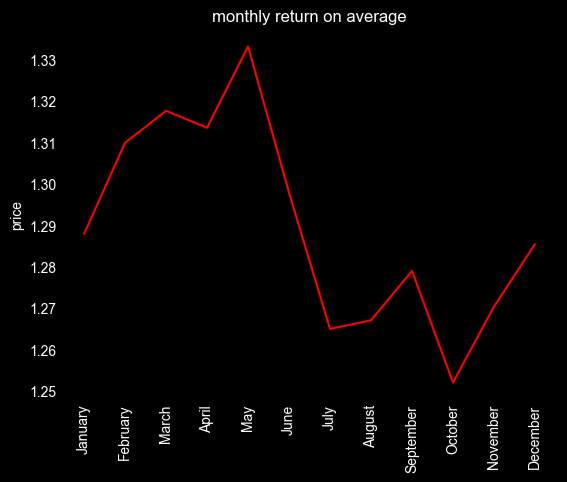

In [114]:
price2["month"]=price2["date"].dt.month_name()
price2["date"]=price2["date"].dt.month


price2gruppo=price2.groupby(["date","month"]).mean().reset_index()
plt.plot(price2gruppo["month"],price2gruppo[" value"],color="red")
plt.xticks(rotation=90)
# plt.grid()
plt.title("monthly return on average")
plt.ylabel("price")
plt.style.use("dark_background")
# print(plt.style.available)
print(price2gruppo)

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif=vif.sort_values(by=["VIF"],ascending=False)
    return vif
print(cal_vif(db1.drop(columns=["date","cofeeprice"])))

           variables           VIF
1  percentchangincpi  33549.954434
2      inflationrate  33044.468625
3    changeinflation     10.230329
0          annualcpi      3.290311


In [116]:
#Choosing the model

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,accuracy_score

x=db1.drop(columns=["cofeeprice","date","percentchangincpi","inflationrate"])
y=db1["cofeeprice"]
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
result=cross_validate(model,x,y,cv=10)
print(result["test_score"].mean())

print(db1.head())

# Very ineffective due to very low correlations


-1.6330395243857327
   date  annualcpi  percentchangincpi  cofeeprice  inflationrate  \
0  1973   0.000000           0.474820    0.058729       0.469863   
1  1974   0.021624           0.827338    0.065267       0.820607   
2  1975   0.041483           0.683453    0.058396       0.683122   
3  1976   0.055163           0.438849    0.443832       0.438722   
4  1977   0.071492           0.496403    0.891063       0.493157   

   changeinflation  
0         0.783040  
1         1.000000  
2         0.252203  
3         0.088106  
4         0.546256  


                   annualcpi  percentchangincpi  cofeeprice  inflationrate  \
annualcpi           1.000000          -0.686792   -0.541344      -0.689596   
percentchangincpi  -0.686792           1.000000    0.075490       0.999773   
cofeeprice         -0.541344           0.075490    1.000000       0.081257   
inflationrate      -0.689596           0.999773    0.081257       1.000000   
changeinflation     0.480951          -0.247134   -0.245325      -0.256222   
cluster                  NaN                NaN         NaN            NaN   

                   changeinflation  cluster  
annualcpi                 0.480951      NaN  
percentchangincpi        -0.247134      NaN  
cofeeprice               -0.245325      NaN  
inflationrate            -0.256222      NaN  
changeinflation           1.000000      NaN  
cluster                        NaN      NaN  
[[0.41662989 0.26888489 0.29838756 0.2658151  0.41189427]
 [0.82555423 0.18324164 0.43427715 0.18042185 0.47577093]
 [0.09046778 0.

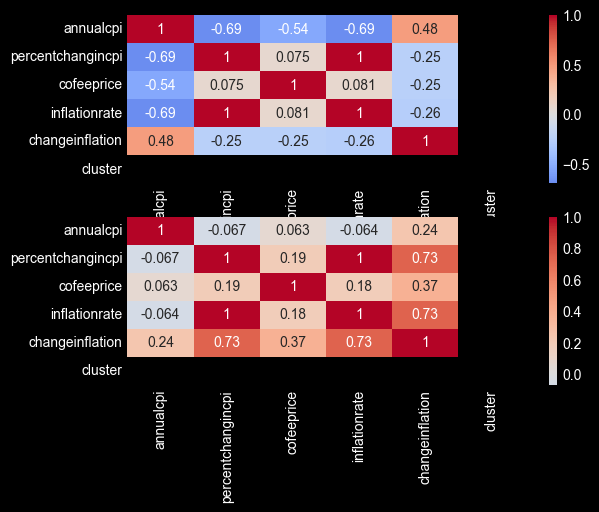

In [117]:
#Clustering

from sklearn.cluster import KMeans
import numpy as np
db2=db1.copy().drop(columns=["date"])
# km=KMeans(n_clusters=3)
# km.fit(db2)
centroidi=np.array([[0.41662989, 0.26888489, 0.29838756, 0.2658151,  0.41189427],
 [0.82555423, 0.18324164, 0.43427715, 0.18042185, 0.47577093],
 [0.09046778, 0.70863309, 0.38419038, 0.70561393, 0.60669053]])
kmcentroidi=KMeans(n_clusters=3, init=centroidi, n_init=1, random_state=42)
kmcentroidi.fit(db2)
labels=kmcentroidi.labels_
db2["cluster"]=labels
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
cluster1=db2.query("cluster==0")
cluster2=db2.query("cluster==1")
cluster3=db2.query("cluster==2")


sns.heatmap(cluster1.corr(), annot=True, cmap="coolwarm", center=0,ax=ax1)
sns.heatmap(cluster2.corr(), annot=True, cmap="coolwarm", center=0,ax=ax2)
# print(db2.head())
print(cluster1.corr())
print(centroidi)


In [118]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif=vif.sort_values(by=["VIF"],ascending=False)
    return vif
print(cal_vif(cluster1.drop(columns=["cofeeprice","cluster"])))

           variables           VIF
1  percentchangincpi  26961.469955
2      inflationrate  26360.957600
3    changeinflation     12.318524
0          annualcpi      9.026279


In [119]:
cluster1=cluster1.drop(columns=["cluster"])
cluster2=cluster2.drop(columns=["cluster"])
cluster3=cluster3.drop(columns=["cluster"])
from sklearn.model_selection import GridSearchCV
# grid = {
#     'n_estimators': [50, 100, 150],  # Numero di alberi nella foresta
#     'learning_rate': [0.01, 0.1, 0.2],  # Tasso di apprendimento
#     'max_depth': [3, 5, 7],  # Profondità massima dell'albero
#     'min_samples_split': [2, 5, 10],  # Numero minimo di campioni necessari per suddividere un nodo
#     'min_samples_leaf': [1, 2, 4]  # Numero minimo di campioni necessari per essere una foglia
# }
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# model=LinearRegression()
# search=GridSearchCV(estimator=model, param_grid=grid, cv=5)


x=cluster1.drop(columns=["cofeeprice","percentchangincpi","inflationrate"])
y=cluster1["cofeeprice"]
# result=cross_validate(model,x,y,cv=10)
# print((result["test_score"]).mean())

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7, random_state=0)
# search.fit(xtrain,ytrain)
# bestmodel=search.best_estimator_
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
print(r2_score(ytest,pred))
print(x)

0.6972780928337583
    annualcpi  changeinflation
3    0.055163         0.088106
9    0.229921         0.000000
10   0.243601         0.140969
11   0.262577         0.582599
12   0.278906         0.379956
13   0.287732         0.280837
14   0.305384         0.657489
15   0.326125         0.507709
16   0.351280         0.545154
17   0.380847         0.525330
18   0.405119         0.334802
19   0.423213         0.329295
20   0.441748         0.453744
21   0.458076         0.425110
22   0.476611         0.484581
23   0.496470         0.476872
24   0.512357         0.397577
25   0.523389         0.375551
26   0.539276         0.533040
27   0.563989         0.593612
28   0.585613         0.401982
29   0.597970         0.325991
30   0.616064         0.537445
31   0.637688         0.507709


In [120]:
new=pd.DataFrame({"annualcpi":[0.796558],
                  "changeinflation":[0.629956]
                  })
# print(cluster1.head())
predictions=model.predict(new)
print(new)
print(predictions)
print(cluster2)


   annualcpi  changeinflation
0   0.796558         0.629956
[0.11436572]
    annualcpi  percentchangincpi  cofeeprice  inflationrate  changeinflation
32   0.665931           0.273381    0.271369       0.269564         0.541850
33   0.693733           0.258993    0.273191       0.257568         0.443833
34   0.718888           0.237410    0.321003       0.230728         0.421806
35   0.754192           0.302158    0.394314       0.301668         0.571586
36   0.750662           0.000000    0.359895       0.000000         0.001101
37   0.766549           0.143885    0.552505       0.143513         0.682819
38   0.796558           0.258993    1.000000       0.252598         0.629956
39   0.817299           0.179856    0.608273       0.174387         0.342511
40   0.832304           0.136691    0.362365       0.130913         0.396476
41   0.848632           0.143885    0.623935       0.142232         0.480176
42   0.849956           0.035971    0.396971       0.034096         0.297357
43 